Data collection
<br> Data is collected from the url: https://data.world/promptcloud/fashion-products-on-amazon-com

Data Extraction
<br> Using Pandas library the csv was stored into an Dataframe 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
%matplotlib inline


In [21]:
products_df = pd.read_csv("amazon_co-ecommerce_sample.csv")

In [22]:
products_df.head(2)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."


In [5]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [23]:
products_df = products_df.replace(' out of 5 stars', '', regex = True)

In [24]:
products_df.tail(2)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
9998,cd783d0b8b44e631b9788b203eaaefae,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,3 new,1,3.0,5.0,Hobbies > Collectible Figures & Memorabilia > ...,NaN,Designed by Ed BenesIt's here - the third seri...,Technical Details Item Weight181 g Product Dim...,Designed by Ed BenesIt's here - the third seri...,NaN,NaN,The best sculpt in a while // 5.0 // 13 May 20...,"{""seller""=>[{""Seller_name_1""=>""Smaller World F..."
9999,94d18e86e504bee1e392df7e5738b18a,Star Wars 1/72 Y-Wing Starfighter,Bandai,£21.20,31 new,11,3.0,4.5,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Bandai-Star-Wars-Fight...,NaN,Technical Details Item Weight299 g Product Dim...,NaN,NaN,NaN,Gold leader // 5.0 // 31 Aug. 2015 // By\n ...,NaN


Data Analysis and Visualization
<br> Part 1) Based on ratings, trying to find the manufacurer with the highest number of bad ratings. 
<br> Motivation: It will be easy to enter the retail market with categories and sub cateories of products for that maufacturer. 

<Axes: title={'center': 'Distribution of Ratings'}, xlabel='average_review_rating'>

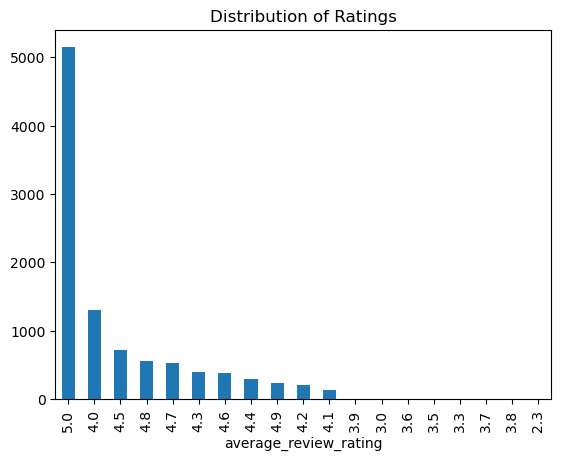

In [25]:
products_df['average_review_rating'].value_counts().plot(kind='bar', title = 'Distribution of Ratings')


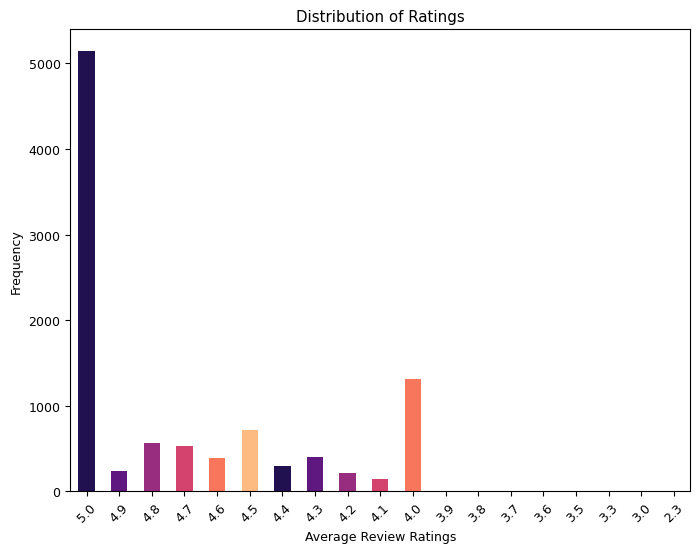

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

color_palette = "magma" 

# Increase font size
plt.rcParams.update({'font.size': 9})

# Sort the value counts series in descending order
value_counts_sorted = products_df['average_review_rating'].value_counts().sort_index(ascending=False)

# Plot the bar chart
plt.figure(figsize=(8, 6))  
value_counts_sorted.plot(kind='bar', color=sns.color_palette(color_palette))
plt.title('Distribution of Ratings')  
plt.xlabel('Average Review Ratings')
plt.ylabel('Frequency')  

plt.xticks(rotation=45)  
plt.show()


More than 4000 ratings are 5 star, ~1500 are 4 star remaining (50 percent) lie between the two, that means 5 is good, 4.1 to 4.9 is neutral and 4 is consiered bad, since nothing is worst than 4 in the dataset.

In [26]:
def categorize_rating(row):
    num = float(row['average_review_rating'])  # Convert to float
    if num == 5.0:
        return "Good"
    elif num <= 4.0:
        return "Bad"
    else:
        return "Neutral"

products_df['cat_rating'] = products_df.apply(categorize_rating, axis=1)


Assigning 4/5 as bad; 5/5 as good and rest all (4.1 to 4.9) as neutral. 

<Axes: title={'center': 'Distribution of Ratings'}, xlabel='cat_rating'>

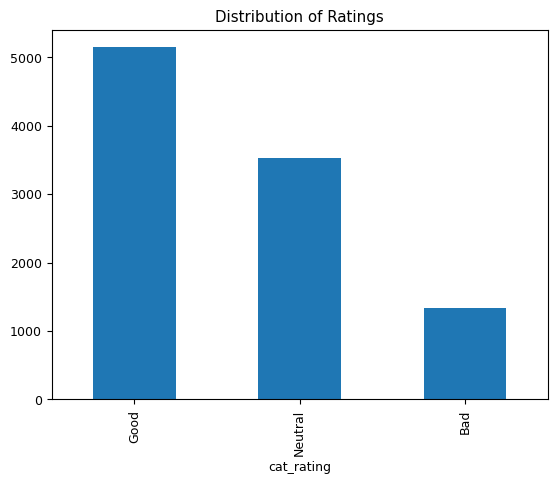

In [10]:
products_df['cat_rating'].value_counts().plot(kind = 'bar', title = 'Simplification of Ratings')


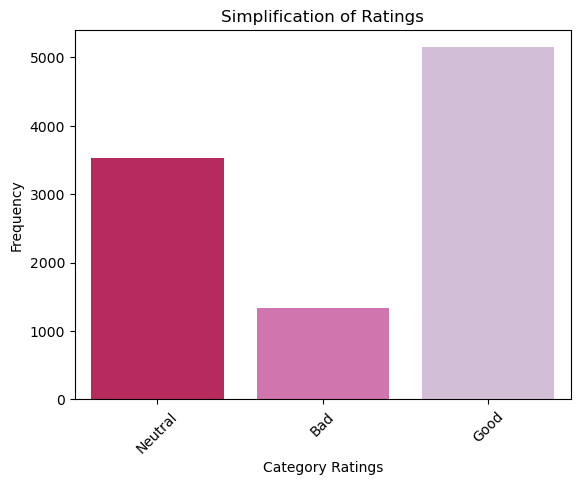

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose a color palette
color_palette = "PuRd_r"  # Example palette, you can choose any other

# Increase font size
plt.rcParams.update({'font.size': 10})

# Plot the bar chart
#plt.figure(figsize=(6, 5))  # Adjust plot size
sns.countplot(data = products_df, x='cat_rating', palette = color_palette)
plt.title('Simplification of Ratings')  # Add title
plt.xlabel('Category Ratings')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


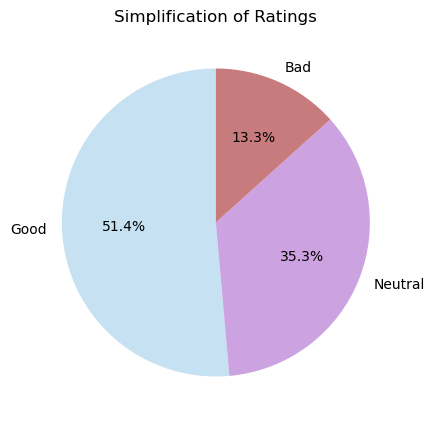

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose a color palette
color_palette = "cubehelix_r"  # Example palette, you can choose any other

# Increase font size
plt.rcParams.update({'font.size': 10})

# Get the value counts of the category ratings
value_counts = products_df['cat_rating'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 5))  # Adjust plot size
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette(color_palette))
plt.title('Simplification of Ratings')  # Add title
plt.ylabel('')  # Hide y-axis label as it's not needed for pie charts
plt.show()


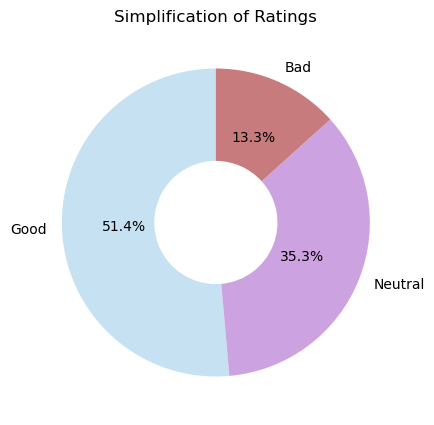

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

color_palette = "cubehelix_r"  # Example palette, you can choose any other

plt.rcParams.update({'font.size': 10})

# Get the value counts of the category ratings
value_counts = products_df['cat_rating'].value_counts()

# Plot the donut chart
plt.figure(figsize=(6, 5))  
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle = 90, colors=sns.color_palette(color_palette), wedgeprops=dict(width=0.6))
plt.title('Simplification of Ratings') 
plt.ylabel('')  
plt.show()


Getting all manufacturers who have bad ratings (4/5) (in the below snippet)

In [89]:
bad_man = []
for i in range(0,len(products_df['manufacturer'])):
    if products_df['average_review_rating'][i] == "4.0":
        bad_man.append(products_df['manufacturer'][i])

In [90]:
len(bad_man)

1312

In [91]:
count = pd.Series(bad_man).value_counts()

In [92]:
count_list = list(count)

In [93]:
count_index_list = count.index.tolist()

In [94]:
len(count_index_list)

729

Total were 1312, since many might repeat converted that into unique list with its respective count
<br> bad_man_index is manufacturer name
<br> bad_man_count is number of times it got 4 star ratings

In [95]:
bad_man_index = []
bad_man_count = []

for i in range(0, len(count)):
    if count_list[i] > 10:
        bad_man_index.append(count_index_list[i])
        bad_man_count.append(count_list[i])   
        

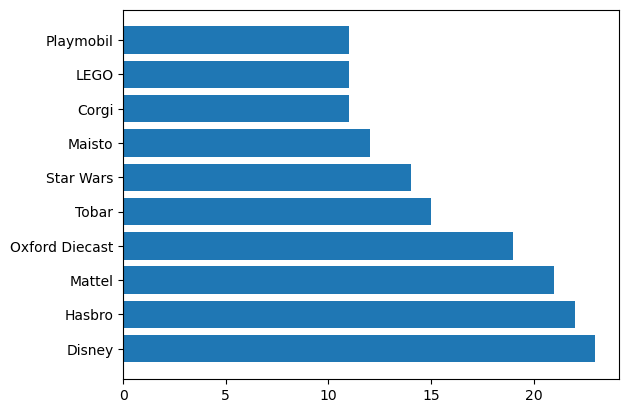

In [96]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.barh(bad_man_index, bad_man_count)

plt.show()

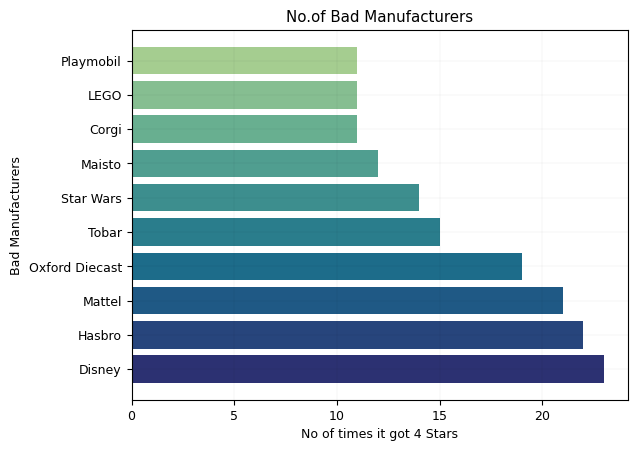

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming bad_man_index and bad_man_count are defined
fig, ax = plt.subplots()

# Create a color map
cmap = plt.get_cmap("crest_r")
colors = cmap(np.linspace(0, 1, len(bad_man_index)))

plt.rcParams.update({'font.size': 9})

# Create the bar plot with color map
bars = ax.barh(bad_man_index, bad_man_count, color = colors)

# Add some aesthetics
plt.title('No.of Bad Manufacturers')  # Add a title
plt.xlabel('No of times it got 4 Stars')  # Label for x-axis
plt.ylabel('Bad Manufacturers')  # Label for y-axis

# Highlight the bar with the highest count
#bars[bad_man_count.index(max(bad_man_count))].set_color('purple')

# Add grid lines
ax.grid(True, which='both', color='black', linewidth=0.03)

# Show the plot
plt.show()


The manufacturer "Disney" has the most number of negative reviews. We can now focus on what type of products it makes and try to launch a competitive product in its place. 

In [35]:
Disney_cat = []
for i in range(0,len(products_df)):
    if products_df['manufacturer'][i] == "Disney":
        Disney_cat.append(products_df["amazon_category_and_sub_category"][i])

In [36]:
unique_Disney_cat = list(zip(*np.unique(Disney_cat, return_counts=True)))

In [37]:
unique_Disney_cat

[('Characters & Brands > Disney > Toys', 159),
 ('Die-Cast & Toy Vehicles > Toy Vehicles & Accessories > Scaled Models > Vehicles',
  8)]

The branding of "disney" takes up a large portion of the cost, if we can make similar quality product with less price it will be comparitively an easy sub category to enter the market.

Part 2) Trying to find brands/products with good quality (good ratings and good number of reviews). 
<br> Motivation: Knowing the best selling products will help us understand the market better, will be easy to focus on the demand-supply eco-system. 

The column "number_of_reviews" is dirty, the 3 following snippet is for:-
1. Handling nan values, nan --> "0" (str)
2. Handling values with comma, (need to remove comma to include as int)
3. Convert all string values into integer

In [38]:
for i in range(0,len(products_df['manufacturer'])):
    if type(products_df['number_of_reviews'][i]) == float:
        products_df.loc[i, 'number_of_reviews'] = "0"


In [39]:
for i in range(len(products_df['manufacturer'])):
    # Remove commas from 'number_of_reviews' column using .loc accessor
    products_df.loc[i, 'number_of_reviews'] = products_df.loc[i, 'number_of_reviews'].replace(",", "")


In [40]:
products_df['number_of_reviews'] = products_df['number_of_reviews'].astype(int)

The column "number_of_answered_questions" is dirty, the 3 following snippet is for:-

1. Converting all float data into string
2. Handling nan values, nan --> "0" (str)
3. removing the decimal to convert all string values into integer

In [49]:
products_df['number_of_answered_questions'] = products_df['number_of_answered_questions'].astype(str)


In [50]:

for i in range(len(products_df['manufacturer'])):
    if pd.isna(products_df.loc[i, 'number_of_answered_questions']) or products_df.loc[i, 'number_of_answered_questions'] == 'nan':
        products_df.loc[i, 'number_of_answered_questions'] = "0"
    else:
        products_df.loc[i, 'number_of_answered_questions'] = str(products_df.loc[i, 'number_of_answered_questions']).replace(".0", "")


In [51]:


for i in range(len(products_df['manufacturer'])):
    value = products_df.loc[i, 'number_of_answered_questions']
    if value.isdigit():  # Check if the value is a digit
        products_df.loc[i, 'number_of_answered_questions'] = int(value)
    else:
        products_df.loc[i, 'number_of_answered_questions'] = 0  # Set non-numeric values to 0


In [52]:
products_df['number_of_answered_questions'] = products_df['number_of_answered_questions'].astype(int)


Fetching all good selling products with its manufacturer info which have, 
1. neutral/good ratings
2. Have more than 50 reviews
3. stocks available (since the dataset is skewed towards it, we will target with least stock than looking for no stock)
4. have most number of answered questions (> 10)

In [144]:
good_stock_man = []
good_stock_prod = []

for i in range(0,len(products_df['manufacturer'])):
    if products_df['number_available_in_stock'][i] != "NaN" and products_df['number_of_reviews'][i] > 50 and products_df['average_review_rating'][i] != 4.0 and products_df['number_of_answered_questions'][i] > 10:
        good_stock_man.append(products_df['manufacturer'][i])
        good_stock_prod.append(products_df['amazon_category_and_sub_category'][i])

#print(good_stock_man)
#print("\n",good_stock_prod)


good_stock_man_index_list: Contains the manufacturer name
and
good_stock_man_count_list: Contains the count of each manufacturer. 
<br> With the above 4 conditions we will fetch good quality products.

In [145]:
good_stock_man_count = pd.Series(good_stock_man).value_counts()
good_stock_man_count_list = list(good_stock_man_count)
good_stock_man_index_list = good_stock_man_count.index.tolist()

gsmcl = []
gsmil = []

for i in range(0, len(good_stock_man_count_list)):
        gsmcl.append(good_stock_man_count_list[i])
        gsmil.append(good_stock_man_index_list[i])

print(gsmil)
print(gsmcl)


['Intex', 'Hama', 'Viskey', 'Ateamart', 'Glitter Tattoo Starter Kits', "Smiffy's", 'Hot Wheels', 'Wizards of the Coast', 'LEGO', 'Cabbage Patch Kids', 'Casdon', 'Tomy', 'Playmobil', 'Linkee 4 little questions. 1 big link.']
[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


The below plot show the list of manufacturer that are selling good quality products. 

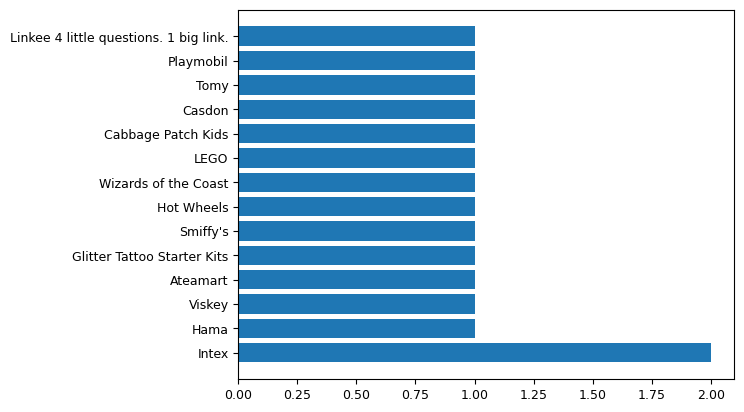

In [125]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.barh(gsmil, gsmcl)
plt.show()


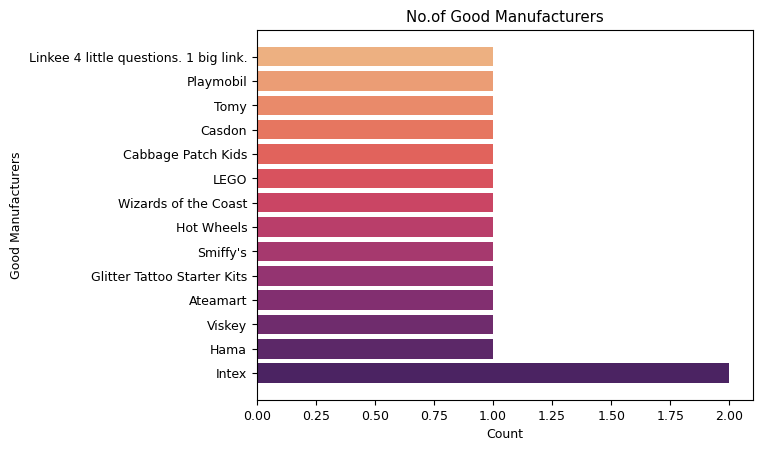

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming bad_man_index and bad_man_count are defined
fig, ax = plt.subplots()

# Create a color map
cmap = plt.get_cmap('flare_r')
colors = cmap(np.linspace(0, 1, len(gsmil)))

plt.rcParams.update({'font.size': 9})

# Create the bar plot with color map
bars = ax.barh(gsmil, gsmcl, color = colors)

# Add some aesthetics
plt.title('No.of Good Manufacturers')  # Add a title
plt.xlabel('Count')  # Label for x-axis
plt.ylabel('Good Manufacturers')  # Label for y-axis

# Add grid lines
#ax.grid(True, which = 'both', color = 'black', linewidth=0.03)

# Show the plot
plt.show()


Similarly, we list the the catogories of products that are in demand and people are putting effort in rating them and asking several questions before buying them. 

In [152]:
good_stock_prod_count = pd.Series(good_stock_prod).value_counts()
good_stock_prod_count_list = list(good_stock_prod_count)
good_stock_prod_index_list = good_stock_prod_count.index.tolist()

gspcl = []
gspil = []

for i in range(0, len(good_stock_prod_count_list)):
    gspcl.append(good_stock_prod_count_list[i])
    gspil.append(good_stock_prod_index_list[i])

print(gspil)

["Arts & Crafts > Children's Craft Kits > Bead Art & Jewellery-Making", 'Storage, Cleaning & Ring Sizers > Boxes & Organisers', "Bedding & Linens > Children's Bedding > Sheets & Pillowcases > Flat Sheets", 'Sports Toys & Outdoor > Beach Toys > Paddling Pools', 'Camping & Hiking > Sleeping Gear > Air Pumps > Hand Pumps', 'Fancy Dress > Accessories > Temporary Tattoos', 'Fancy Dress > Costumes > Adults', 'Hobbies > Slot Cars, Race Tracks & Accessories > Slot Cars', 'Hobbies > Trading Cards & Accessories > Packs & Sets', 'Dolls & Accessories > Soft Dolls', 'Pretend Play > Shops & Accessories', 'Characters & Brands > Tomy', 'Figures & Playsets > Pirates', 'Games > Trivia & Quiz Games']


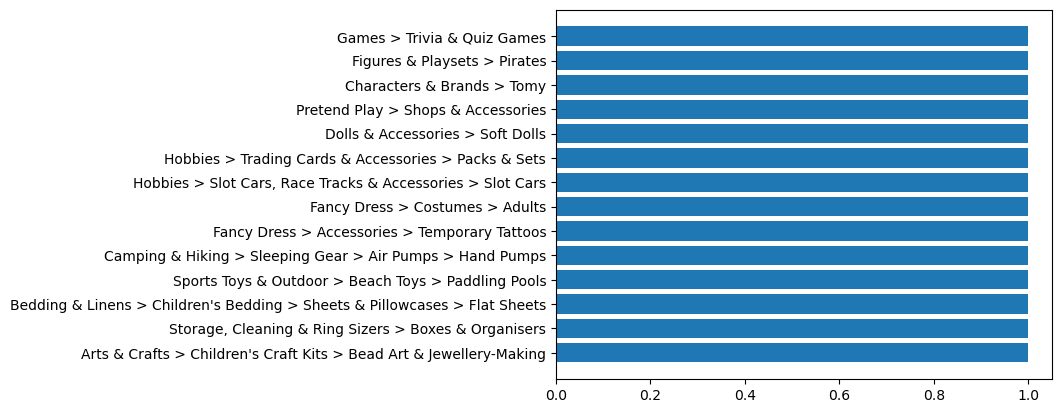

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.barh(gspil, gspcl)
plt.show()


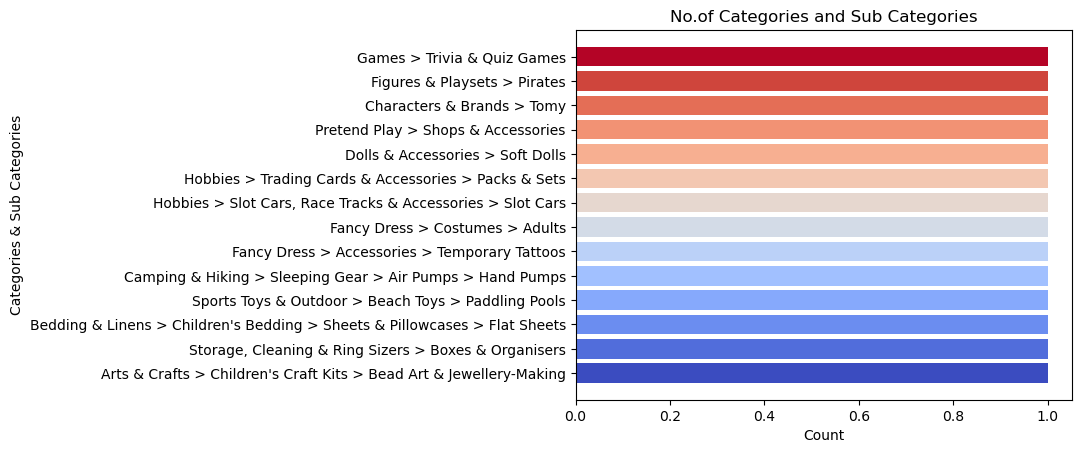

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming bad_man_index and bad_man_count are defined
fig, ax = plt.subplots()

# Create a color map
cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, len(gspil)))

plt.rcParams.update({'font.size':10})

# Create the bar plot with color map
bars = ax.barh(gspil, gspcl, color = colors)

# Add some aesthetics
plt.title('No.of Categories and Sub Categories')  # Add a title
plt.xlabel('Count')  # Label for x-axis
plt.ylabel('Categories & Sub Categories')  # Label for y-axis

# Add grid lines
#ax.grid(True, which = 'both', color = 'black', linewidth=0.03)

# Show the plot
plt.show()


Sentimental Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re


[nltk_data] Downloading package punkt to C:\Users\Prachi S
[nltk_data]     Vithlani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Prachi S
[nltk_data]     Vithlani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#%pip install nltk 

In [ ]:
#%pip install wordcloud

In [2]:
products = pd.read_csv("amazon_co-ecommerce_sample.csv")
products = products.replace(' out of 5 stars', '', regex = True)


In [3]:
products.head(2)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."


In [4]:
products = products.drop(9999)

for i in range(0, len(products)):
    if type(products['customer_reviews'][i]) == float:
        products = products.drop(i) 
        

In [5]:
products['average_review_rating'] = products['average_review_rating'].astype(float)

In [6]:
products = products.reset_index()

In [7]:
for i in range(0, len(products)):
    #print(i)
    if products['average_review_rating'][i] > 4.0:
        products['average_review_rating'][i] = 1
    else:
        products['average_review_rating'][i] = 0

In [8]:
products['average_review_rating'].value_counts()

average_review_rating
1.0    8646
0.0    1332
Name: count, dtype: int64

In [9]:

products['customer_reviews'] = products['customer_reviews'].astype(str)


In [10]:
for i in range(0, len(products)):
    products['customer_reviews'][i] = products['customer_reviews'][i].replace("\n", "")
    products['customer_reviews'][i] = re.sub(r'\/\/.*',"",products['customer_reviews'][i])
    
    
print(products['customer_reviews'].head())
    

0    Worth Buying For The Pictures Alone (As Ever) 
1                                       Four Stars 
2                          **Highly Recommended!** 
3                                        I love it 
4                                 Birthday present 
Name: customer_reviews, dtype: object


In [11]:
## Remove HTML Tags
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

products.customer_reviews = products.customer_reviews.apply(clean)
products.customer_reviews[0]

'Worth Buying For The Pictures Alone (As Ever) '

In [12]:
## Remove Special Characters
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

products.customer_reviews = products.customer_reviews.apply(is_special)
products.customer_reviews[0]

'Worth Buying For The Pictures Alone  As Ever  '

In [13]:
## Convert everything to lowercase
def to_lower(text):
    return text.lower()

products.customer_reviews = products.customer_reviews.apply(to_lower)
products.customer_reviews[0]

'worth buying for the pictures alone  as ever  '

In [14]:
stp_words = stopwords.words('english')

def clean_review(review):
    cleanreview = " ".join(word for word in review.
                       split() if word not in stp_words)
    return cleanreview
 
products['customer_reviews'] = products['customer_reviews'].apply(clean_review)
products.customer_reviews[0]


'worth buying pictures alone ever'

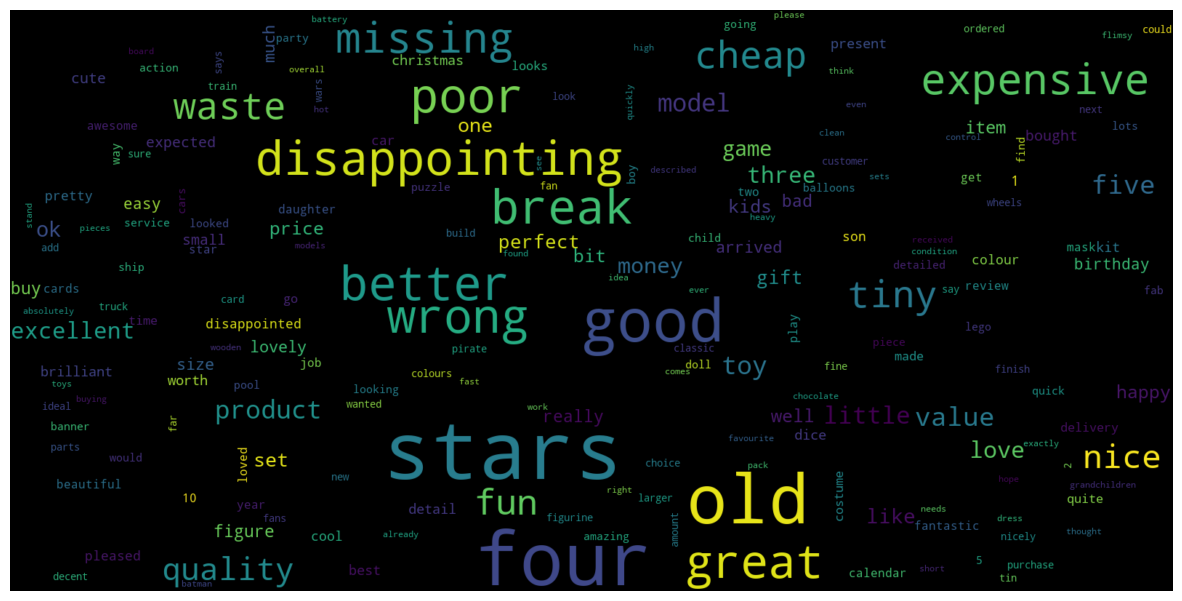

In [15]:
from collections import Counter

# Existing consolidated string
consolidated = ' '.join(word for word in products['customer_reviews'][products['average_review_rating'] == 0].astype(str))

# Define specific words to be more prominent
specific_words = ['disappointing', 'better', 'expensive', 'cheap', 'wrong', 'old', 'break','poor', 'missing','tiny','waste']

# Create a frequency dictionary from the consolidated string
word_freq = Counter(consolidated.split())

# Increase the frequency of the specific words
for word in specific_words:
    if word in word_freq:
        word_freq[word] *= 20  # Increase frequency, adjust the multiplier as needed

# Generate the word cloud from the frequency dictionary
wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110).generate_from_frequencies(word_freq)

plt.figure(figsize=(15,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()


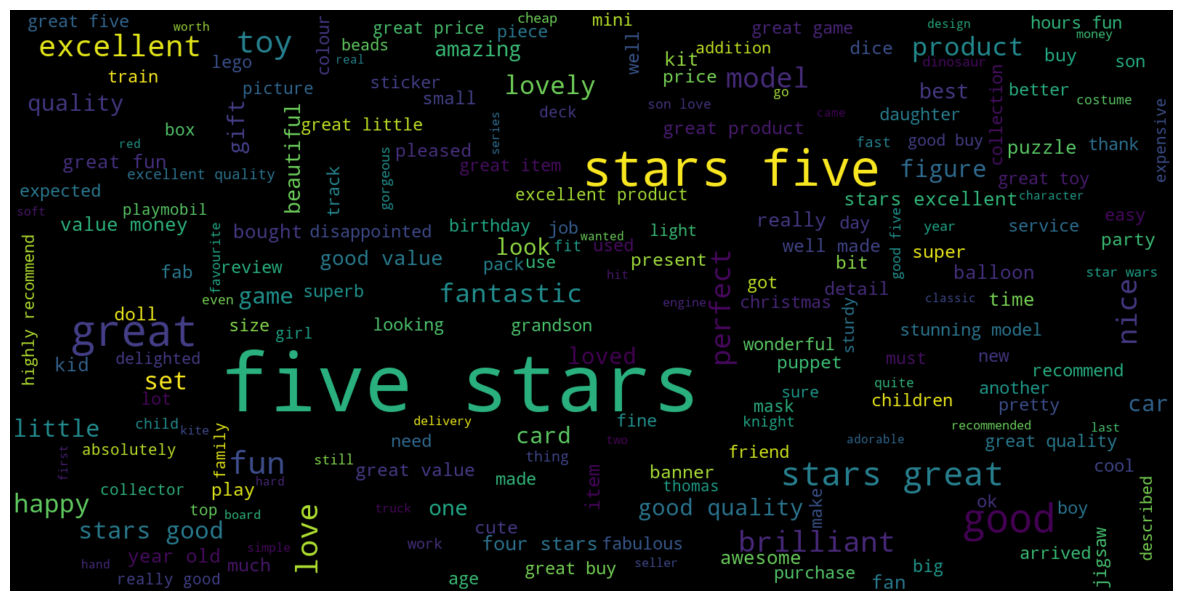

In [16]:
consolidated = ' '.join(word for word in products['customer_reviews'][products['average_review_rating'] == 1].astype(str))
wordCloud = WordCloud(width = 1600, height = 800, random_state = 21, max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [17]:
cv = TfidfVectorizer(max_features = 2500)

X = cv.fit_transform(products['customer_reviews']).toarray()


In [18]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(X, products['customer_reviews'],
                                                test_size = 0.1 ,
                                                random_state = 42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
 
#Model fitting
model.fit(x_train, y_train)
 
#testing the model
pred = model.predict(x_test)
 
#model accuracy
print(accuracy_score(y_test,pred))


0.3637274549098196
